# PYTHON FINAL PROJECT

## Data preprocessing

### Import libraries

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, validation_curve

### Loading data into dataframe

In [121]:
df = pd.read_csv('drug_consumption.data')
df

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### Data cleaning

The column line should be the first row. We have to add a new row with the values of the column line to the dataframe :

In [122]:
new_first_row = {'1': 1, '0.49788': 0.49788, '0.48246': 0.48246, '-0.05921' : -0.05921, '0.96082' : 0.96082, '0.12600' : 0.12600, '0.31287' : 0.31287, '-0.57545' : -0.57545, '-0.58331' : -0.58331, '-0.91699' : -0.91699, '-0.00665' : -0.00665, '-0.21712' : -0.21712, '-1.18084' : -1.18084, 'CL5' : 'CL5', 'CL2' : 'CL2',  'CL0' : 'CL0', 'CL2.1' : 'CL2', 'CL6' : 'CL6', 'CL0.1' : 'CL0', 'CL5.1' : 'CL5', 'CL0.2' : 'CL0', 'CL0.3' : 'CL0', 'CL0.4' : 'CL0','CL0.5' : 'CL0', 'CL0.6' : 'CL0', 'CL0.7' : 'CL0', 'CL0.8' : 'CL0', 'CL0.9' : 'CL0', 'CL0.10' : 'CL0', 'CL2.2' : 'CL2', 'CL0.11' : 'CL0', 'CL0.12' : 'CL0'}

Now we have a new row with the right values. We have to put it as the first row of the dataframe : 

In [123]:
df.loc[-1] = new_first_row
df.index = df.index + 1
df = df.sort_index()

We can now rename the columns with the right names : 

In [124]:
new_column_names = ["ID", "Age", "Gender", "Education","Country", "Ethnicity", "Neurticism_Score", "Extraversion_score","Openness_to_experience_score","Agreeableness","Conscientiousness","Impulsiveness","Sensation_seeing","Alcohol","amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semeron_fictious","Volatile_substance_abuse"]
df.columns = new_column_names

display(df)

,ID,Age,Gender,Education,Country,Ethnicity,Neurticism_Score,Extraversion_score,Openness_to_experience_score,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron_fictious,Volatile_substance_abuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [125]:
df.replace(to_replace="CL0", value= 0 , inplace=True)
df.replace(to_replace="CL1", value= 1 , inplace=True)
df.replace(to_replace="CL2", value= 2 , inplace=True)
df.replace(to_replace="CL3", value= 3 , inplace=True)
df.replace(to_replace="CL4", value= 4 , inplace=True)
df.replace(to_replace="CL5", value= 5 , inplace=True)
df.replace(to_replace="CL6", value= 6 , inplace=True)

There is a column that is a fake drug to detect liars (Semeron is not a drug).
The presence of a response other than 'Never Used' (CL0 - 0) indicates that the person have lied during their responses. Therefore, we will eliminate all responses that have anything other than 0 for this drug.
Let's drop this column and all the lines that contain a value different than 0 for this column : 

In [126]:
# Only keep lines with 0 in Semeron_fictious column
df = df[df['Semeron_fictious'] == 0]

# Drop this column and reindexing
df = df.drop(columns=['Semeron_fictious'])
df = df.reset_index(drop=True)

display(df)

,ID,Age,Gender,Education,Country,Ethnicity,Neurticism_Score,Extraversion_score,Openness_to_experience_score,Agreeableness,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Volatile_substance_abuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,2,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0,4,0,2,0,2,3,0,4,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,2,0,0,0,0,2,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,1,0,0,1,0,0,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,0,3,3,0,0,0,5
1873,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,0,2,0,0,3,5,4,4,5,0
1874,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,0,4,0,2,0,2,0,2,6,0
1875,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,0,3,0,0,3,3,0,3,4,0


Now that we have the right columns, we can finally gather information from the dataframe

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1877 entries, 0 to 1876
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1877 non-null   int64  
 1   Age                           1877 non-null   float64
 2   Gender                        1877 non-null   float64
 3   Education                     1877 non-null   float64
 4   Country                       1877 non-null   float64
 5   Ethnicity                     1877 non-null   float64
 6   Neurticism_Score              1877 non-null   float64
 7   Extraversion_score            1877 non-null   float64
 8   Openness_to_experience_score  1877 non-null   float64
 9   Agreeableness                 1877 non-null   float64
 10  Conscientiousness             1877 non-null   float64
 11  Impulsiveness                 1877 non-null   float64
 12  Sensation_seeing              1877 non-null   float64
 13  Alc

We can see that there is no missing value.
We also know that there were 1885, 1877 now respondants and there are indeed 1877 rows, so we can conclude that there is no data deduplication

From the documentation of the dataset, we can observe that the values are already in a numerical form, except for the values of the drugs columns, that we have changed into integers.

## Visualize the raw data

We will work with a copy of df starting from now

In [128]:
df_eng = df.copy()
df_eng.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neurticism_Score,Extraversion_score,Openness_to_experience_score,Agreeableness,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Volatile_substance_abuse
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,2,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,0,4,0,2,0,2,3,0,4,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,2,0,0,0,0,2,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,0,1,0,0,1,0,0,2,2,0


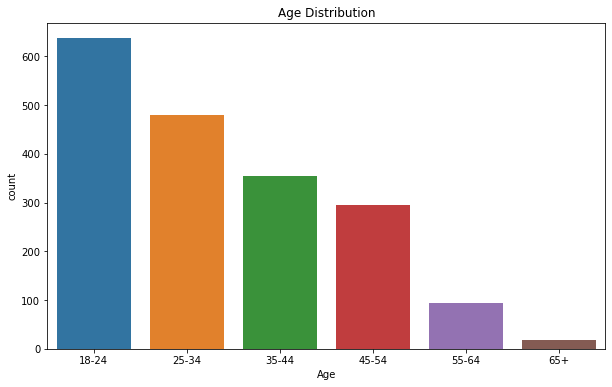

In [129]:
# convert the 'Age' column back to its original values
age_mapping = {
    -0.95197: '18-24',
    -0.07854: '25-34',
    0.49788: '35-44',
    1.09449: '45-54',
    1.82213: '55-64',
    2.59171: '65+'
}
df_eng['Age'] = df_eng['Age'].map(age_mapping)

plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Age', order=age_mapping.values())
plt.title('Age Distribution')
plt.show()

In [130]:
#convert the columns back to their original values
gender_mapping = {
    0.48246: 'Female',
    -0.48246: 'Male'
}
education_mapping = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years',
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years',
    -0.61113: 'Some college or university, no certificate or degree',
    -0.05921: 'Professional certificate/ diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'
}
country_mapping = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}
ethnicity_mapping = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

df_eng['Gender'] = df_eng['Gender'].map(gender_mapping)
df_eng['Education'] = df_eng['Education'].map(education_mapping)
df_eng['Country'] = df_eng['Country'].map(country_mapping)
df_eng['Ethnicity'] = df_eng['Ethnicity'].map(ethnicity_mapping)
df_eng.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neurticism_Score,Extraversion_score,Openness_to_experience_score,Agreeableness,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Volatile_substance_abuse
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,2,0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,4,0,2,0,2,3,0,4,0
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,0,0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,2,0,0,0,0,2,0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,1,0,0,1,0,0,2,2,0


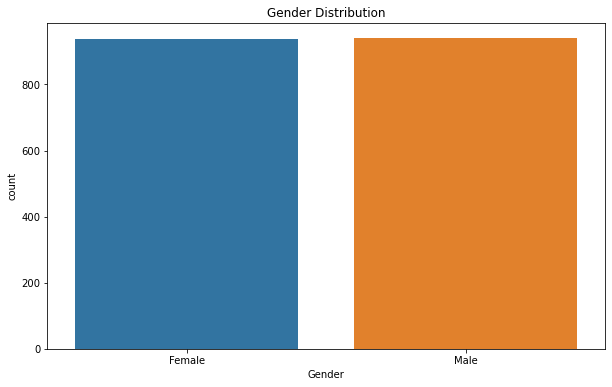

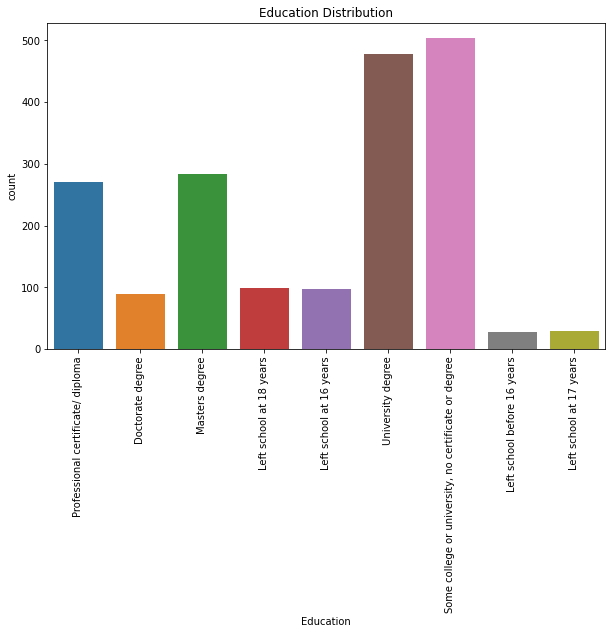

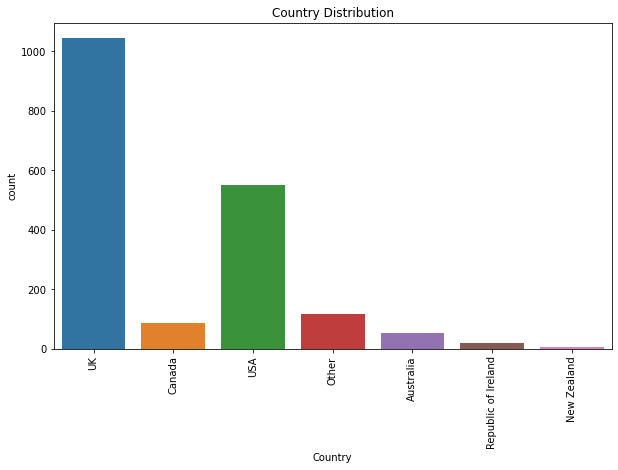

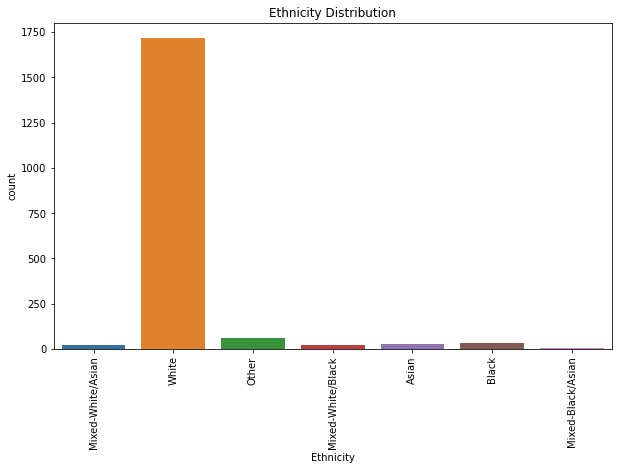

In [131]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Education')
plt.title('Education Distribution')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Country')
plt.title('Country Distribution')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Ethnicity')
plt.title('Ethnicity Distribution')
plt.xticks(rotation=90)
plt.show()

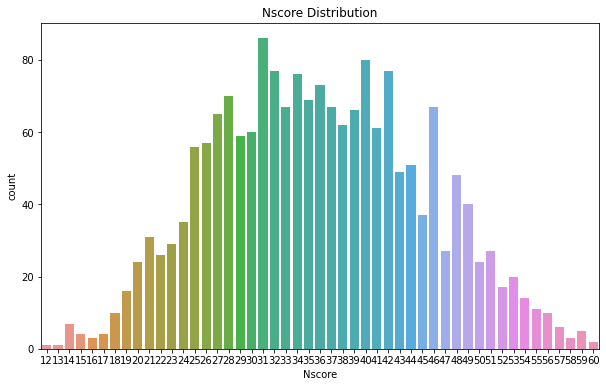

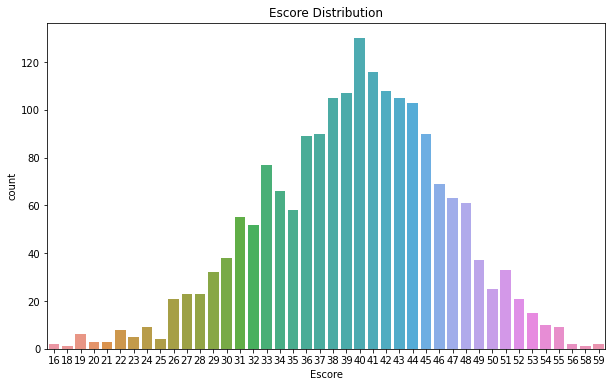

In [132]:
# we need to convert the columns back to their original values
nscore_mapping = {
    -3.46436: 12,
    -3.15735: 13,
    -2.75696: 14,
    -2.52197: 15,
    -2.42317: 16,
    -2.34360: 17,
    -2.21844: 18,
    -2.05048: 19,
    -1.86962: 20,
    -1.69163: 21,
    -1.55078: 22,
    -1.43907: 23,
    -1.32828: 24,
    -1.19430: 25,
    -1.05308: 26,
    -0.92104: 27,
    -0.79151: 28,
    -0.67825: 29,
    -0.58016: 30,
    -0.46725: 31,
    -0.34799: 32,
    -0.24649: 33,
    -0.14882: 34,
    -0.05188: 35,
     0.04257: 36,
     0.13606: 37,
     0.22393: 38,
     0.31287: 39,
     0.41667: 40,
     0.52135: 41,
     0.62967: 42,
     0.73545: 43,
     0.82562: 44,
     0.91093: 45,
     1.02119: 46,
     1.13281: 47,
     1.23461: 48,
     1.37297: 49,
     1.49158: 50,
     1.60383: 51,
     1.72012: 52,
     1.83990: 53,
     1.98437: 54,
     2.12700: 55,
     2.28554: 56,
     2.46262: 57,
     2.61139: 58,
     2.82196: 59,
     3.27393: 60
}
escore_mapping = {
    -3.27393: 16,
    -3.00537: 18,
    -2.72827: 19,
    -2.53830: 20,
    -2.44904: 21,
    -2.32338: 22,
    -2.21069: 23,
    -2.11437: 24,
    -2.03972: 25,
    -1.92173: 26,
    -1.76250: 27,
    -1.63340: 28,
    -1.50796: 29,
    -1.37639: 30,
    -1.23177: 31,
    -1.09207: 32,
    -0.94779: 33,
    -0.80615: 34,
    -0.69509: 35,
    -0.57545: 36,
    -0.43999: 37,
    -0.30033: 38,
    -0.15487: 39,
     0.00332: 40,
     0.16767: 41,
     0.32197: 42,
     0.47617: 43,
     0.63779: 44,
     0.80523: 45,
     0.96248: 46,
     1.11406: 47,
     1.28610: 48,
     1.45421: 49,
     1.58487: 50,
     1.74091: 51,
     1.93886: 52,
     2.12700: 53,
     2.32338: 54,
     2.57309: 55,
     2.85950: 56,
     3.00537: 58,
     3.27393: 59
}

df_eng['Nscore'] = df_eng['Neurticism_Score'].map(nscore_mapping)
df_eng['Escore'] = df_eng['Extraversion_score'].map(escore_mapping)

plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Nscore')
plt.title('Nscore Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=df_eng, x='Escore')
plt.title('Escore Distribution')
plt.show()

Ponctual Users of drugs

In [133]:
drug_columns = ["Alcohol", "amphet", "Amyl", "Benzos", "Caff", "Cannabis", 
                "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", 
                "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Volatile_substance_abuse"]

# Création d'un DataFrame pour stocker les utilisateurs ponctuels
df_ponctual_users = pd.DataFrame()

for drug in drug_columns:
    # Conditions pour identifier les utilisateurs ponctuels
    
    # Consommé hier (6) mais pas la semaine dernière (5) ni le mois dernier (4) ni l'année dernière (3)
    condition_yesterday = (df_eng[drug] == 6) & (df_eng[drug] > 5)

    # Consommé la semaine dernière (5) mais pas hier (6), ni le mois dernier (4), ni l'année dernière (3)
    condition_last_week = (df_eng[drug] == 5) & (df_eng[drug] != 6)

    # Consommé le mois dernier (4) mais pas hier (6), ni la semaine dernière (5), ni l'année dernière (3)
    condition_last_month = (df_eng[drug] == 4) & (df_eng[drug] < 5) & (df_eng[drug] != 3)

    # Ajouter les utilisateurs ponctuels au DataFrame
    df_ponctual_users[drug] = condition_yesterday | condition_last_week | condition_last_month

# Exemple : Afficher les utilisateurs ponctuels pour l'Alcool
print("Utilisateurs ponctuels pour l'Alcool:")
print(df_ponctual_users['Alcohol'])
non_null_counts = df_ponctual_users.notnull().sum().sum()
print("Nombre total d'entrées non nulles :", non_null_counts)

# Afficher toutes les entrées non nulles
# print("Entrées non nulles dans df_ponctual_users :")
# Compter le nombre d'entrées qui ne sont pas False dans df_ponctual_users
not_false_counts = (df_ponctual_users != False).sum().sum()
print("Nombre total d'entrées qui ne sont pas 'False' :", not_false_counts)

# Afficher toutes les entrées qui ne sont pas False
print("Entrées qui ne sont pas 'False' dans df_ponctual_users :")
not_false_entries = df_ponctual_users[df_ponctual_users != False]

print(not_false_entries)



Utilisateurs ponctuels pour l'Alcool:
0       True
1       True
2       True
3       True
4       True
        ... 
1872    True
1873    True
1874    True
1875    True
1876    True
Name: Alcohol, Length: 1877, dtype: bool
Nombre total d'entrées non nulles : 33786
Nombre total d'entrées qui ne sont pas 'False' : 8617
Entrées qui ne sont pas 'False' dans df_ponctual_users :
     Alcohol amphet  Amyl Benzos  Caff Cannabis  Choc  Coke Crack Ecstasy  \
0       True    NaN   NaN    NaN  True      NaN  True   NaN   NaN     NaN   
1       True    NaN   NaN    NaN  True     True  True   NaN   NaN    True   
2       True    NaN   NaN    NaN  True      NaN  True   NaN   NaN     NaN   
3       True    NaN   NaN    NaN  True      NaN  True   NaN   NaN     NaN   
4       True    NaN   NaN    NaN  True      NaN  True   NaN   NaN     NaN   
...      ...    ...   ...    ...   ...      ...   ...   ...   ...     ...   
1872    True    NaN   NaN    NaN  True     True  True   NaN   NaN     NaN   
1873    T

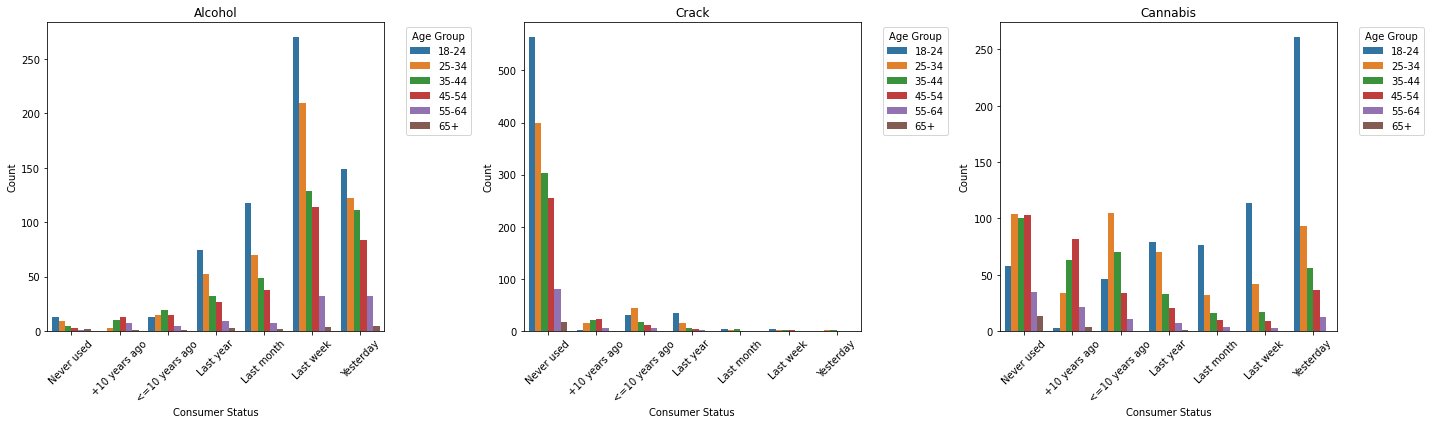

In [134]:
# il n y a donc pas de "faux" forts consommateurs, 
# et l indice de 0 à 6 correspond bien à l intensité de la consommation

selected_drugs = ["Alcohol", "Crack", "Cannabis"]

# Mappage des niveaux de consommation
consumer_mapping = {
    0: 'Never used',  # Never Consumed
    1: '+10 years ago',  # Over a Decade Ago
    2: '<=10 years ago',  # Last Decade
    3: 'Last year',      # Last Year
    4: 'Last month',      # Last Month
    5: 'Last week',      # Last Week
    6: 'Yesterday'       # Yesterday
}

# Faire fondre le DataFrame pour avoir une ligne par enregistrement de consommation de drogue
df_age_melted = df_eng.melt(id_vars=['Age'], value_vars=selected_drugs, var_name='Drug', value_name='Consumption')

# Appliquer le mappage
df_age_melted['Consumer_Status'] = df_age_melted['Consumption'].map(consumer_mapping)

# Compter le nombre de consommateurs et de non-consommateurs pour chaque groupe d'âge et drogue
age_consumer_counts = df_age_melted.groupby(['Age', 'Drug', 'Consumer_Status']).size().reset_index(name='Count')

# Ordre des statuts de consommation du moins au plus intense
consumption_order = ['Never used', '+10 years ago', '<=10 years ago', 'Last year', 'Last month', 'Last week', 'Yesterday']

# Créer un graphique séparé pour chaque drogue sélectionnée
plt.figure(figsize=(20, 6))  # Ajuster la taille de la figure si nécessaire

for i, drug in enumerate(selected_drugs, 1):
    plt.subplot(1, len(selected_drugs), i)  # Créer un sous-graphique pour chaque drogue
    drug_data = age_consumer_counts[age_consumer_counts['Drug'] == drug]
    sns.barplot(x='Consumer_Status', y='Count', hue='Age', data=drug_data, order=consumption_order)
    plt.title(drug)
    plt.xlabel("Consumer Status")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

plt.show()

Focus on Alcohol, Crack and Cannabis

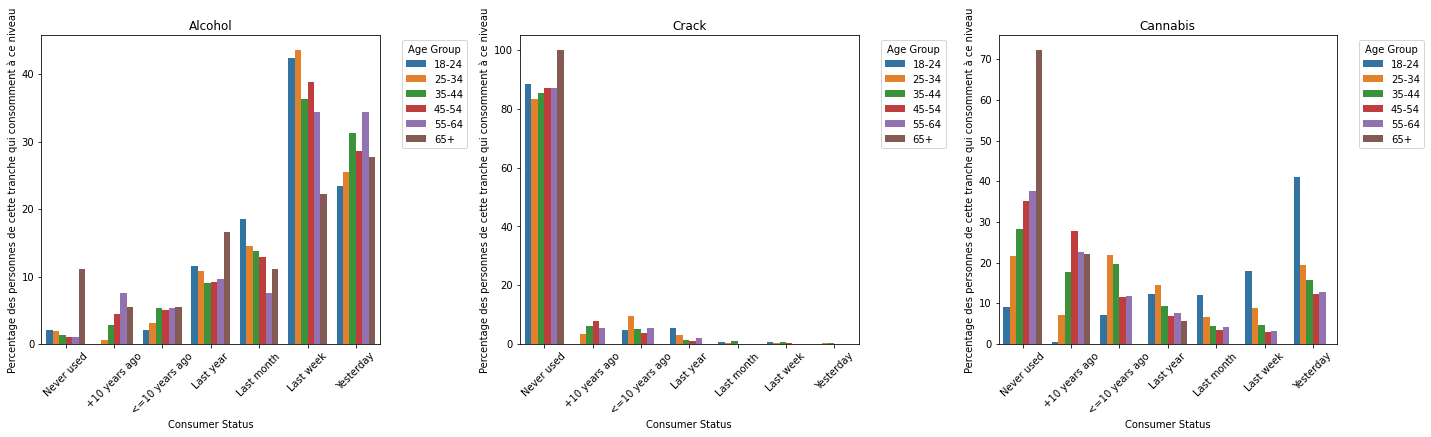

In [135]:
# regardons les mêmes graphes mais en terme de pourcentages:
selected_drugs = ["Alcohol", "Crack", "Cannabis"]


# Faire fondre le DataFrame
df_age_melted = df_eng.melt(id_vars=['Age'], value_vars=selected_drugs, var_name='Drug', value_name='Consumption')
df_age_melted['Consumer_Status'] = df_age_melted['Consumption'].map(consumer_mapping)

# Compter le nombre total de réponses pour chaque groupe d'âge et drogue
age_consumer_counts = df_age_melted.groupby(['Age', 'Drug', 'Consumer_Status']).size().reset_index(name='Count')
total_counts = age_consumer_counts.groupby(['Age', 'Drug'])['Count'].transform('sum')
age_consumer_counts['Percentage'] = age_consumer_counts['Count'] / total_counts * 100

# Créer un graphique séparé pour chaque drogue sélectionnée
plt.figure(figsize=(20, 6))

for i, drug in enumerate(selected_drugs, 1):
    plt.subplot(1, len(selected_drugs), i)
    drug_data = age_consumer_counts[age_consumer_counts['Drug'] == drug]
    sns.barplot(x='Consumer_Status', y='Percentage', hue='Age', data=drug_data, order=consumer_mapping.values())
    plt.title(drug)
    plt.xlabel("Consumer Status")
    plt.ylabel("Percentage des personnes de cette tranche qui consomment à ce niveau")
    plt.xticks(rotation=45)
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
plt.show()


# chaque barre représente le pourcentage de personnes d'un certain groupe d'âge ayant un statut de consommation spécifique 
# pour chaque drogue sélectionnée. Le pourcentage est calculé en divisant le nombre de personnes dans chaque catégorie de consommation
# par le nombre total de réponses pour le groupe d'âge et la drogue concernés. 



In [136]:
""" 
Quelques interprétations notables : 
    40 % des jeunes repondants consomment très réulièrement du cannabis ! seuls 10% n'ont jamais testé
    70% des 65+ n'ont jamais essayé le canabis

le graphique crack est peu lisible car une grande partie (+80%) des repondants n'ont jamais essayé.
    --> on aurait pu faire un zoom sur ceux qui ont déjà testé, mais pas fait par manque de temps et pour plus de concision
    
voyons ces graphiques pour chaque drogue illégale 
"""

" \nQuelques interprétations notables : \n    40 % des jeunes repondants consomment très réulièrement du cannabis ! seuls 10% n'ont jamais testé\n    70% des 65+ n'ont jamais essayé le canabis\n\nle graphique crack est peu lisible car une grande partie (+80%) des repondants n'ont jamais essayé.\n    --> on aurait pu faire un zoom sur ceux qui ont déjà testé, mais pas fait par manque de temps et pour plus de concision\n    \nvoyons ces graphiques pour chaque drogue illégale \n"

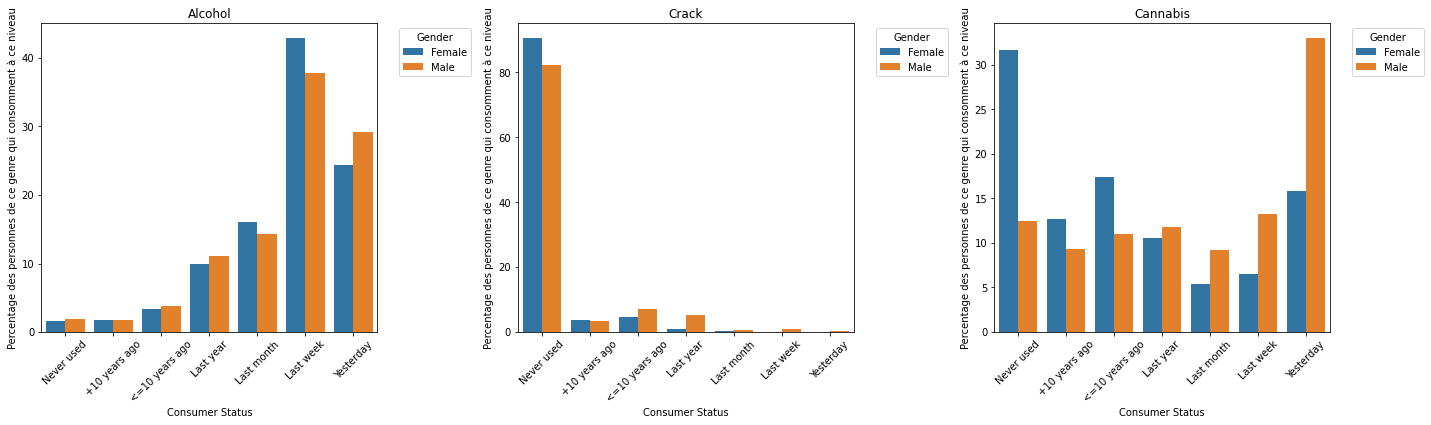

In [137]:
# RECHERCHE DE CORELATION GENRE-CONSOMMATION 

selected_drugs = ["Alcohol", "Crack", "Cannabis"]

# Faire fondre le DataFrame pour le genre et la consommation
df_gender_melted = df_eng.melt(id_vars=['Gender'], value_vars=selected_drugs, var_name='Drug', value_name='Consumption')
df_gender_melted['Consumer_Status'] = df_gender_melted['Consumption'].map(consumer_mapping)

# Compter le nombre total de réponses pour chaque genre et drogue
gender_consumer_counts = df_gender_melted.groupby(['Gender', 'Drug', 'Consumer_Status']).size().reset_index(name='Count')
total_counts = gender_consumer_counts.groupby(['Gender', 'Drug'])['Count'].transform('sum')
gender_consumer_counts['Percentage'] = gender_consumer_counts['Count'] / total_counts * 100

# Créer un graphique séparé pour chaque drogue sélectionnée
plt.figure(figsize=(20, 6))

for i, drug in enumerate(selected_drugs, 1):
    plt.subplot(1, len(selected_drugs), i)
    drug_data = gender_consumer_counts[gender_consumer_counts['Drug'] == drug]
    sns.barplot(x='Consumer_Status', y='Percentage', hue='Gender', data=drug_data, order=consumer_mapping.values())
    plt.title(drug)
    plt.xlabel("Consumer Status")
    plt.ylabel("Percentage des personnes de ce genre qui consomment à ce niveau")
    plt.xticks(rotation=45)
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
plt.show()

In [138]:
#interessons nous maintenant aux correlations  entre :
# une caractéristique comme l age, le genre, le niveau d etude, ou le nscore /escore, 
# et la consommation de drogue "en general"

# On va donc créer un df avec les personnes qui ont déjà consommé une ou plusieurs drogues

illegal = ['Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'Volatile_substance_abuse']
df['Illegal_drug_user'] = df[illegal].apply(lambda x: 1 if any(x > 2) else 0, axis=1)   
#on considère comme 'user' tous ceux qui ont pris il y a moins d'un an --> choix à débattre


<Figure size 864x432 with 0 Axes>

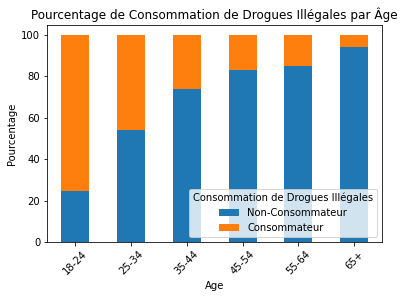

<Figure size 864x432 with 0 Axes>

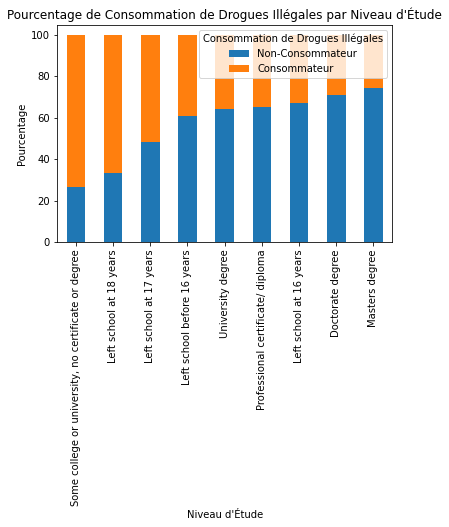

In [139]:
# correlation age en statique 

df_temp = df.copy()

# Appliquer les mappings
df_temp['Age'] = df_temp['Age'].map(age_mapping)
df_temp['Education'] = df_temp['Education'].map(education_mapping)

# Trier par ordre croissant pour l'âge
age_order = sorted(df_temp['Age'].unique())

# Calculer les pourcentages pour l'âge
age_counts = df_temp.groupby(['Age', 'Illegal_drug_user']).size().unstack().fillna(0)
age_percentages = age_counts.div(age_counts.sum(axis=1), axis=0) * 100

# Graphique pour l'âge
plt.figure(figsize=(12, 6))
age_percentages.plot(kind='bar', stacked=True)
plt.title('Pourcentage de Consommation de Drogues Illégales par Âge')
plt.xlabel('Age')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.legend(title='Consommation de Drogues Illégales', labels=['Non-Consommateur', 'Consommateur'])
plt.show()

# Calculer les pourcentages pour le niveau d'étude
education_counts = df_temp.groupby(['Education', 'Illegal_drug_user']).size().unstack().fillna(0)
education_percentages = education_counts.div(education_counts.sum(axis=1), axis=0) * 100

# Trier les pourcentages par ordre décroissant pour le niveau d'étude
education_percentages_sorted = education_percentages.sort_values(by=1, ascending=False)

# Graphique pour le niveau d'étude, trié par ordre décroissant
plt.figure(figsize=(12, 6))
education_percentages_sorted.plot(kind='bar', stacked=True)
plt.title('Pourcentage de Consommation de Drogues Illégales par Niveau d\'Étude')
plt.xlabel('Niveau d\'Étude')
plt.ylabel('Pourcentage')
plt.xticks(rotation=90)
plt.legend(title='Consommation de Drogues Illégales', labels=['Non-Consommateur', 'Consommateur'])
plt.show()

<Figure size 1080x576 with 0 Axes>

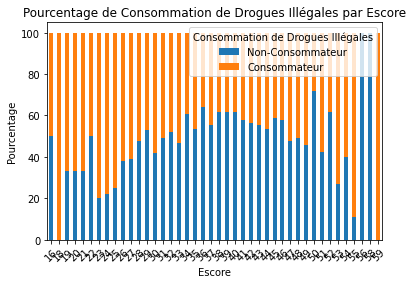

In [140]:
df_temp = df.copy()

# Appliquer les mappings pour Nscore et Escore
df_temp['Nscore'] = df_temp['Neurticism_Score'].map(nscore_mapping)
df_temp['Escore'] = df_temp['Extraversion_score'].map(escore_mapping)

# Calculer les pourcentages pour Escore
escore_counts = df_temp.groupby(['Escore', 'Illegal_drug_user']).size().unstack().fillna(0)
escore_percentages = escore_counts.div(escore_counts.sum(axis=1), axis=0) * 100

# Trier les pourcentages par ordre croissant pour Escore
escore_sorted = escore_percentages.sort_index(ascending=True)

# Graphique pour Escore, trié par ordre croissant
plt.figure(figsize=(15, 8))
escore_sorted.plot(kind='bar', stacked=True)
plt.title('Pourcentage de Consommation de Drogues Illégales par Escore')
plt.xlabel('Escore')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.legend(title='Consommation de Drogues Illégales', labels=['Non-Consommateur', 'Consommateur'])
plt.show()

<Figure size 1080x576 with 0 Axes>

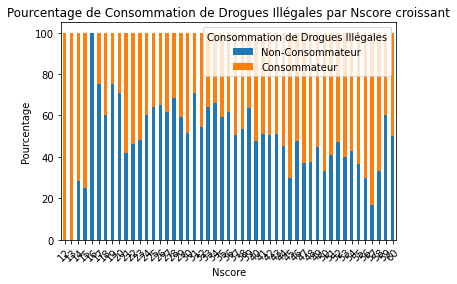

In [141]:
df_temp = df.copy()

# Appliquer les mappings pour Nscore et Escore
df_temp['Nscore'] = df_temp['Neurticism_Score'].map(nscore_mapping)
df_temp['Escore'] = df_temp['Extraversion_score'].map(escore_mapping)

# Calculer les pourcentages pour Escore
escore_counts = df_temp.groupby(['Nscore', 'Illegal_drug_user']).size().unstack().fillna(0)
escore_percentages = escore_counts.div(escore_counts.sum(axis=1), axis=0) * 100

# Trier les pourcentages par ordre croissant pour Escore
escore_sorted = escore_percentages.sort_index(ascending=True)

# Graphique pour Nscore, trié par ordre croissant
plt.figure(figsize=(15, 8))
escore_sorted.plot(kind='bar', stacked=True)
plt.title('Pourcentage de Consommation de Drogues Illégales par Nscore croissant')
plt.xlabel('Nscore')
plt.ylabel('Pourcentage')
plt.xticks(rotation=45)
plt.legend(title='Consommation de Drogues Illégales', labels=['Non-Consommateur', 'Consommateur'])
plt.show()

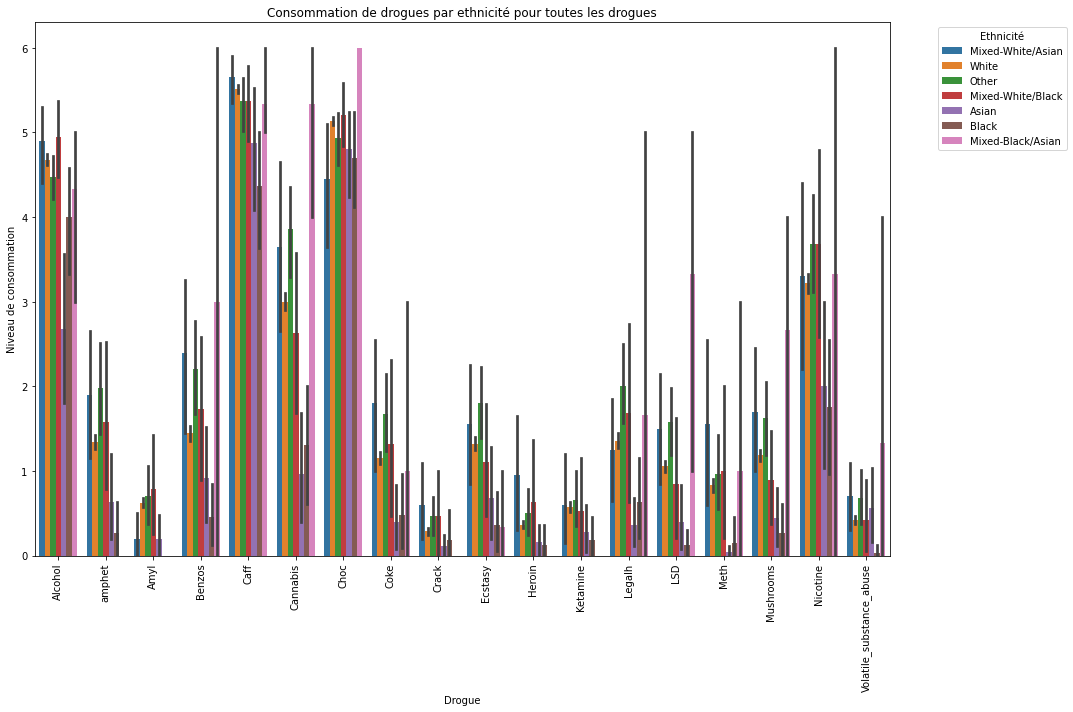

In [142]:
# ethnie mais biaisé car beaucoup plus de blancs
drug_columns = [
    "Alcohol", "amphet", "Amyl", "Benzos", "Caff", "Cannabis", 
    "Choc", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", 
    "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Volatile_substance_abuse"
]

# fondre le DataFrame pour avoir une ligne par enregistrement de consommation de drogue
df_ethnicity_melted = df_eng.melt(id_vars=['Ethnicity'], value_vars=drug_columns, var_name='Drug', value_name='Consumption')

# graphique en barres pour visualiser la corrélation entre la consommation de drogues et l'ethnicité
plt.figure(figsize=(15, 10))
sns.barplot(x='Drug', y='Consumption', hue='Ethnicity', data=df_ethnicity_melted)

plt.title('Consommation de drogues par ethnicité pour toutes les drogues')
plt.xlabel('Drogue')
plt.ylabel('Niveau de consommation')
plt.xticks(rotation=90)  
plt.legend(title='Ethnicité', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  
plt.show()

In [143]:
# Ajoutons un curseur pour positionner la limite entre consommateur et non consommateur. 


import ipywidgets as widgets
df_temp = df.copy()

# Appliquer les mappings pour les caractéristiques (Age, Gender, etc.)
df_temp['Age'] = df_temp['Age'].map(age_mapping)
df_temp['Gender'] = df_temp['Gender'].map(gender_mapping)
df_temp['Education'] = df_temp['Education'].map(education_mapping)

# Fonction pour mettre à jour le graphique
def update_graph(threshold):
    df_temp['Illegal_drug_user'] = df_temp[illegal].apply(lambda x: 1 if any(x > threshold) else 0, axis=1)
    
    # Créer un graphique
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Age', hue='Illegal_drug_user', data=df_temp)
    plt.title('Consommation de Drogues Illégales par Âge avec Seuil de ' + str(threshold))
    plt.xlabel('Age')
    plt.ylabel('Nombre de Personnes')
    plt.legend(title='Consommation de Drogues Illégales', labels=['Non-Consommateur', 'Consommateur'])
    plt.show()

# Création du widget curseur
threshold_slider = widgets.IntSlider(
    value=2,
    min=0,
    max=6,
    step=1,
    description='Seuil:',
    continuous_update=False
)

# Afficher le curseur et le graphique
widgets.interactive(update_graph, threshold=threshold_slider)


interactive(children=(IntSlider(value=2, continuous_update=False, description='Seuil:', max=6), Output()), _do…

If the graphs doesnt appears, check them on the ppt, it happens sometimes

In [144]:
df_temp = df.copy()

# mappings pour les caractéristiques (Age, Gender, etc.)
df_temp['Age'] = df_temp['Age'].map(age_mapping)
df_temp['Gender'] = df_temp['Gender'].map(gender_mapping)
df_temp['Education'] = df_temp['Education'].map(education_mapping)

# mettre à jour le graphique
def update_graph(threshold):
    df_temp['Illegal_drug_user'] = df_temp[illegal].apply(lambda x: 1 if any(x > threshold) else 0, axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.countplot(x='Age', hue='Illegal_drug_user', data=df_temp)
    plt.title('Consommation de Drogues Illégales par Âge avec Seuil de ' + str(threshold))
    plt.xlabel('Age')
    plt.ylabel('Nombre de Personnes')
    plt.legend(title='Consommation de Drogues Illégales', labels=['Non-Consommateur', 'Consommateur'])
    plt.show()


threshold_slider = widgets.IntSlider(
    value=2,
    min=0,
    max=6,
    step=1,
    description='Seuil:',
    continuous_update=False
)

# Afficher 
widgets.interactive(update_graph, threshold=threshold_slider)


interactive(children=(IntSlider(value=2, continuous_update=False, description='Seuil:', max=6), Output()), _do…

If the graphs doesnt appears, check them on the ppt, it happens sometimes

If the graphs doesnt appears, check them on the ppt, it happens sometimes

/var/folders/cy/q5cw65ls4db_14xttbv5grx40000gn/T/ipykernel_96509/1190883223.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hard_Drug_User'] = df_filtered[hard_drugs].max(axis=1) > 0


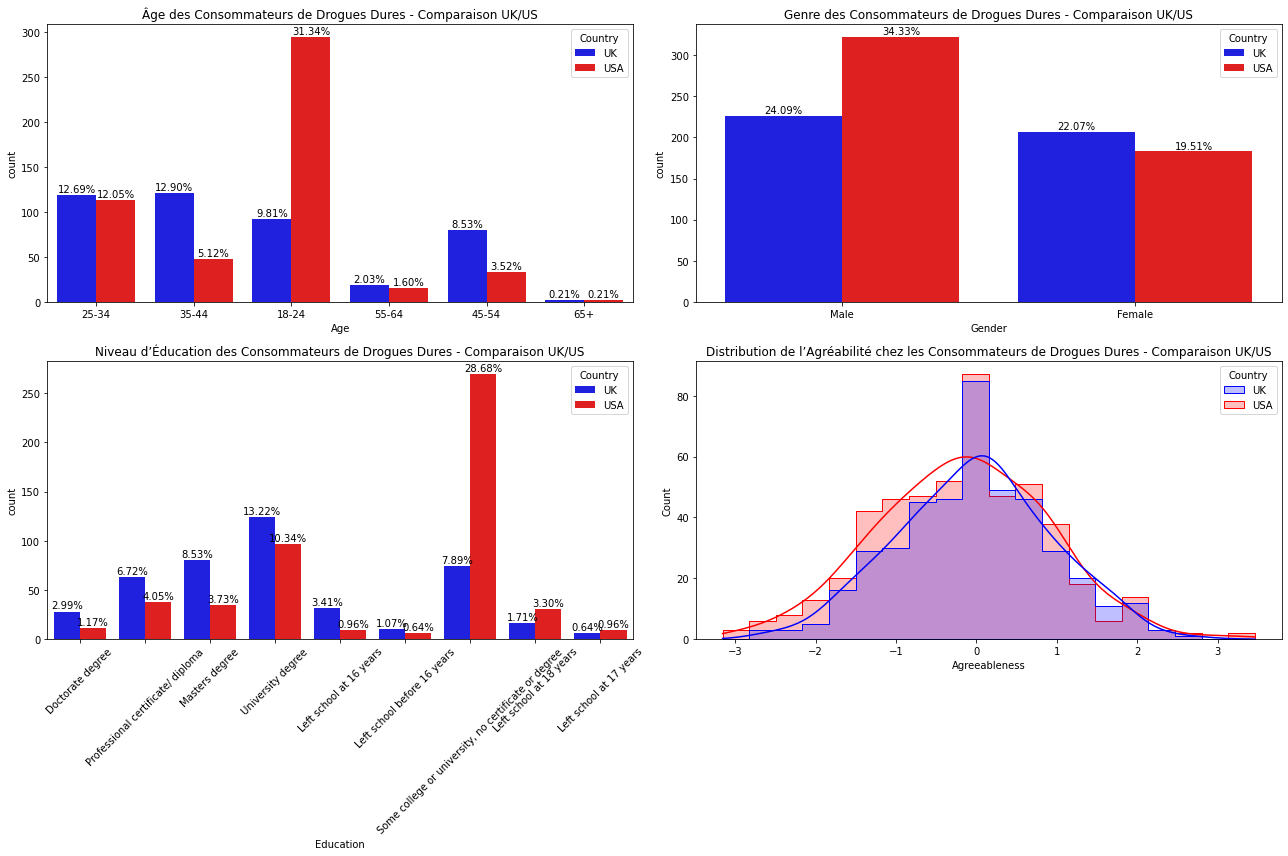

In [145]:
# Superposons les graphiques, et passons en pourcentage, 
# car il n y a pas le meme nombre de repondants anglais qu americains 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Mise à jour de la liste des drogues dures
hard_drugs = ['Ketamine', 'LSD', 'Meth', 'Mushrooms', 'Volatile_substance_abuse']

def analyze_drug_use(df_eng):
    # Filtrer pour inclure uniquement les données du UK et des USA
    df_filtered = df_eng[df_eng['Country'].isin(['UK', 'USA'])]

    # Filtrer les utilisateurs de drogues dures
    df_filtered['Hard_Drug_User'] = df_filtered[hard_drugs].max(axis=1) > 0
    df_filtered_hard_drug_users = df_filtered[df_filtered['Hard_Drug_User']]

    # Fonction pour calculer les pourcentages
    def percentage_plot(data, column, ax):
        total = len(data)
        ax = sns.countplot(x=column, hue='Country', data=data, ax=ax, palette=['blue', 'red'])
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.2f}%'.format(100 * height / total), ha="center")

    # Création des graphiques
    fig, axes = plt.subplots(2, 2, figsize=(18, 12))

    # Analyse par âge
    percentage_plot(df_filtered_hard_drug_users, 'Age', axes[0, 0])
    axes[0, 0].set_title('Âge des Consommateurs de Drogues Dures - Comparaison UK/US')

    # Analyse par genre
    percentage_plot(df_filtered_hard_drug_users, 'Gender', axes[0, 1])
    axes[0, 1].set_title('Genre des Consommateurs de Drogues Dures - Comparaison UK/US')

    # Analyse par niveau d'éducation
    percentage_plot(df_filtered_hard_drug_users, 'Education', axes[1, 0])
    axes[1, 0].set_title('Niveau d’Éducation des Consommateurs de Drogues Dures - Comparaison UK/US')
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Analyse de l'agréabilité (avec histplot, les pourcentages sont plus complexes à calculer, donc ici on se contente d'un histogramme simple)
    sns.histplot(df_filtered_hard_drug_users, x='Agreeableness', hue='Country', element='step', bins=20, kde=True, palette=['blue', 'red'], ax=axes[1, 1])
    axes[1, 1].set_title('Distribution de l’Agréabilité chez les Consommateurs de Drogues Dures - Comparaison UK/US')

    plt.tight_layout()
    plt.show()

# Appel de la fonction pour l'analyse combinée
analyze_drug_use(df_eng)


In [146]:
# represente les pourcentages des utilisateurs de drogue dure qui sont dans cette tranche (d age /diplome...)

In [147]:
df_eng

,ID,Age,Gender,Education,Country,Ethnicity,Neurticism_Score,Extraversion_score,Openness_to_experience_score,Agreeableness,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Volatile_substance_abuse,Nscore,Escore
0,1,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,2,0,39,36
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,2,0,2,3,0,4,0,29,52
2,3,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,1,0,0,31,45
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,2,0,0,0,0,2,0,34,34
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,1,0,0,2,2,0,43,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,1884,18-24,Female,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,3,3,0,0,0,5,25,51
1873,1885,18-24,Male,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,0,0,3,5,4,4,5,0,33,51
1874,1886,25-34,Female,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,0,2,0,2,0,2,6,0,47,30
1875,1887,18-24,Female,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,0,0,3,3,0,3,4,0,45,26


### Preparing data for modeling

Let's create a function called "preprocessing_data()" that takes 3 arguments : a dataframe and , a column, and a list of column names.

This function prepares data by splitting it into training data (80%) and testing data (20%).
It works on a copy of the dataframe, and only selects the chosen columns (features) and the target one (target_column) for better flexibility.

Data normalization in the function is to improve efficiency.

In [148]:
def preprocessing_data(df, target_column, features):
    df = df.copy()
    
    # Select the specified columns
    df = df[features + [target_column]]
    
    # Split features and target
    Y = df[target_column]
    X = df.drop(target_column, axis=1)
    
    # train test splitting
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
    
    # Normalization
    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
    return X_train, X_test, Y_train, Y_test

## Model training : Predicting if an individual uses illegal drugs


For the modeling part, we chose to work on the case in which we would like to pretict if an individual uses illegal drugs (all the drugs except alcohol, caffeine and chocolate), only based on their features (characteristics and personnality) and test many algorithms for the same case, to determine which one would be the best in this situation.

### Creating the target

Let's create a new column "Illegal_drug_user" that will be the target column, because it's what we want to predict.

To do so, we created a list of all column names of illegal drugs, then we created a new binary column in the dataframe that would take the value 0 if the individual has never used any illegal drug, and 1 if the individual has taken any.

In [149]:
illegal = ['Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'Mushrooms', 'Volatile_substance_abuse']
df['Illegal_drug_user'] = df[illegal].apply(lambda x: 1 if any(x > 0) else 0, axis=1)

### Training data

We then create a list called "features" that contains all the column names that describe the individual's features, including their characteristics and personnality :

In [150]:
features = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Neurticism_Score', 'Extraversion_score', 'Openness_to_experience_score', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation_seeing']

This "features" list is a way to select only the columns we want to use for training, excluding the data on the use of drugs in this case.

This code prepares data for machine learning model training, splitting it into training and testing sets, and then displays the size of these sets.

In [151]:
X_train, X_test, Y_train, Y_test = preprocessing_data(df, 'Illegal_drug_user', features)

# Displaying size of train and test sets
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (1501, 12)
Test set: (376, 12)


### Testing algorithms

Let's create a dictionnary with classifier models to test several algorithms : 

In [152]:
models = {'Logistic regression': LogisticRegression(),'Random forest': RandomForestClassifier(),'Support Vector Machine': SVC(),'kNN': KNeighborsClassifier()}

Now, let's create a dictionnary of dictionnaries that contains hyperparameters for each classifier model. This will be necessary for grid search :

In [153]:
hyperparameters = {'Logistic regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},'Random forest': {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},'Support Vector Machine': {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto']},'kNN': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}}

"results" will store the results of all the models with each metric

In [154]:
results = {}

#### Now we have to train and evaluate the models : 

Classification report of Logistic regression:
              precision    recall  f1-score   support

           0       0.69      0.64      0.67       495
           1       0.83      0.86      0.84      1006

    accuracy                           0.79      1501
   macro avg       0.76      0.75      0.76      1501
weighted avg       0.78      0.79      0.79      1501

Classification report of Random forest:
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       495
           1       0.82      0.86      0.84      1006

    accuracy                           0.78      1501
   macro avg       0.75      0.74      0.75      1501
weighted avg       0.78      0.78      0.78      1501

Classification report of Support Vector Machine:
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       495
           1       0.83      0.87      0.85      1006

    accuracy                           0.79    

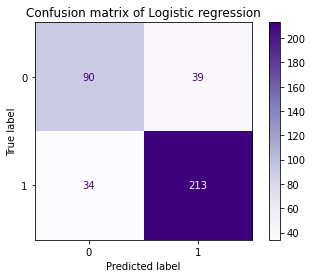

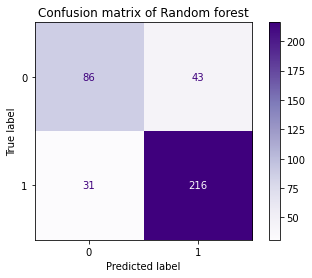

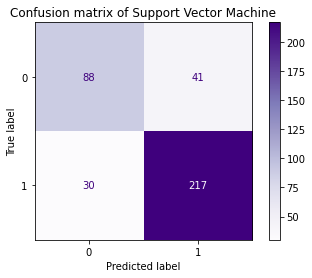

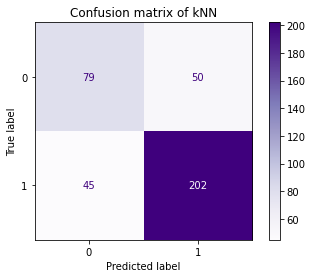

In [156]:
for name, mod in models.items():

    # Grid search
    grid_search = GridSearchCV(mod, hyperparameters[name], cv = 5, scoring = 'accuracy')
    grid_search.fit(X_train, Y_train)
    best_model = grid_search.best_estimator_

    # Cross-validation
    cross_val_predictions = cross_val_predict(best_model, X_train, Y_train, cv = 5)

    # Metrics, classification report for each algorithm
    report = classification_report(Y_train, cross_val_predictions, output_dict = True)
    results[name] = {'accuracy': report['accuracy'],'precision': report['macro avg']['precision'],'recall': report['macro avg']['recall'],'f1-score': report['macro avg']['f1-score']}
    report = classification_report(Y_train, cross_val_predictions)
    print(f'Classification report of {name}:\n{report}')
    
    # Confusion matrix for each algorithm
    cm = confusion_matrix(Y_test, best_model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
    disp.plot(cmap=plt.cm.Purples)
    disp.ax_.set_title(f'Confusion matrix of {name}')


### Results

Let's see the results with a data frame to compare the 4 algorithms with the metrics : 

In [157]:
df_result = pd.DataFrame(results).T
display(df_result)

,accuracy,precision,recall,f1-score
Logistic regression,0.788141,0.761372,0.751646,0.755969
Random forest,0.781479,0.754001,0.741545,0.746872
Support Vector Machine,0.787475,0.761451,0.747044,0.753110
kNN,0.767488,0.737425,0.741882,0.739500


Let's compare the results with a bar plot for better visualization to compare the 4 algorithms: 

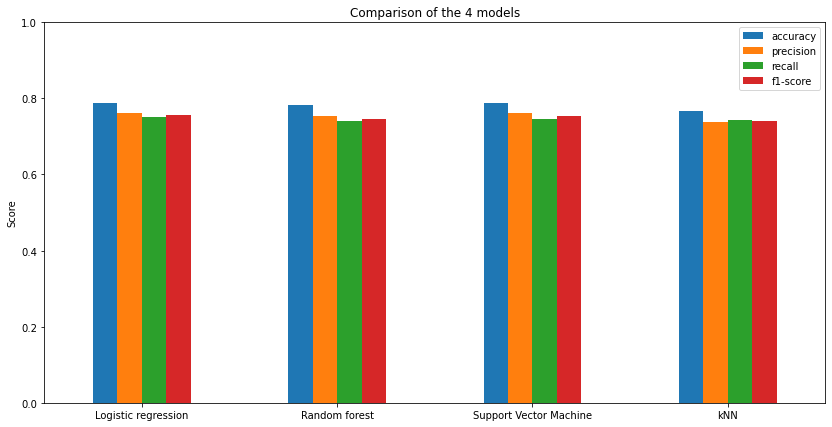

In [158]:
df_result.plot(kind = 'bar', y = ['accuracy', 'precision', 'recall', 'f1-score'], ylim = (0, 1), figsize = (14, 7), rot = 0)
plt.title('Comparison of the 4 models')
plt.ylabel('Score')
plt.show()

We can see that Logistic regression obtains the best score among the 4 algorithms, with an accuracy of 0.79, a f1 score of 0.76, a recall of 0.75 and precision of 0.76 (macro averages)


#### Validation curve

The validation curve is an important diagnostic tool that shows the sensitivity
between to changes in the model's accuracy with change in some parameter of the model.

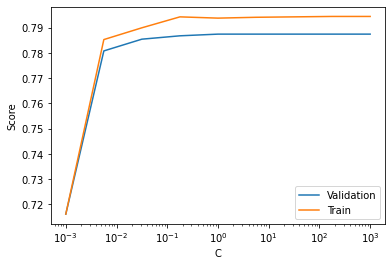

In [159]:
model = LogisticRegression()
C_vals = np.logspace(-3, 3, 9)

# Cross validation scores
train_scores, val_scores = validation_curve(model, X_train, Y_train, param_name='C', param_range=C_vals, cv=5)

# Validation curves
plt.plot(C_vals, val_scores.mean(axis=1), label ='Validation')
plt.plot(C_vals, train_scores.mean(axis=1), label = 'Train')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Score')
plt.legend()
plt.show()

The curves look pretty similar, we can see that there is a little bit of overfitting as the parameter C becomes higher.

#### Learning curve : 

The learning curve is a plot of model learning performance over experience

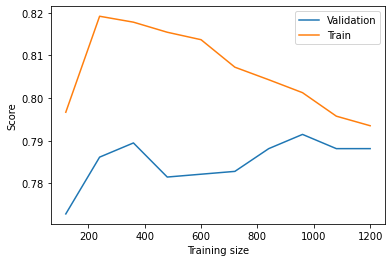

In [160]:
train_sizes, train_scores, val_scores = learning_curve(model, X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 10), cv=5)

# Learning curves
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation')
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.show()